# Data visualization and cleaning
10/02/23  
Using 2 files provided by John

## visualizing protein data

In [2]:
#we have our data, what we want to do is visualize it to determine if it's normal, first let's focu son the ones without any NA values
import pandas as pd
import os
os.chdir('/home/sarthak/cornell/Krumsiek')

# Load the CSV file into a DataFrame
file_path = 'UKBB_300K_Overlapping_OLINK.csv'
data_df = pd.read_csv(file_path)

# Show some basic statistics and the first few rows to understand the data
data_stats = data_df.describe()
data_head = data_df.head()

data_stats, data_head


(                eid          1693          1719          1733          1732  \
 count  2.733700e+04  26768.000000  26858.000000  26755.000000  26727.000000   
 mean   3.514967e+06      0.058562      0.044529      0.060947      0.043071   
 std    1.450920e+06      0.581466      0.422274      0.668980      0.666925   
 min    1.000048e+06     -3.448100     -4.313900     -2.698300     -3.248600   
 25%    2.255459e+06     -0.333425     -0.228137     -0.376050     -0.387400   
 50%    3.509673e+06      0.007000      0.000000      0.003900     -0.004350   
 75%    4.777393e+06      0.388300      0.271400      0.440400      0.412600   
 max    6.025336e+06      6.872000      3.795850      4.533100      5.156700   
 
                1731          1730          1729          1723          1721  \
 count  25794.000000  26635.000000  26718.000000  26257.000000  26718.000000   
 mean      -0.042545      0.167566      0.062454      0.037195     -0.467379   
 std        1.021814      0.933822    

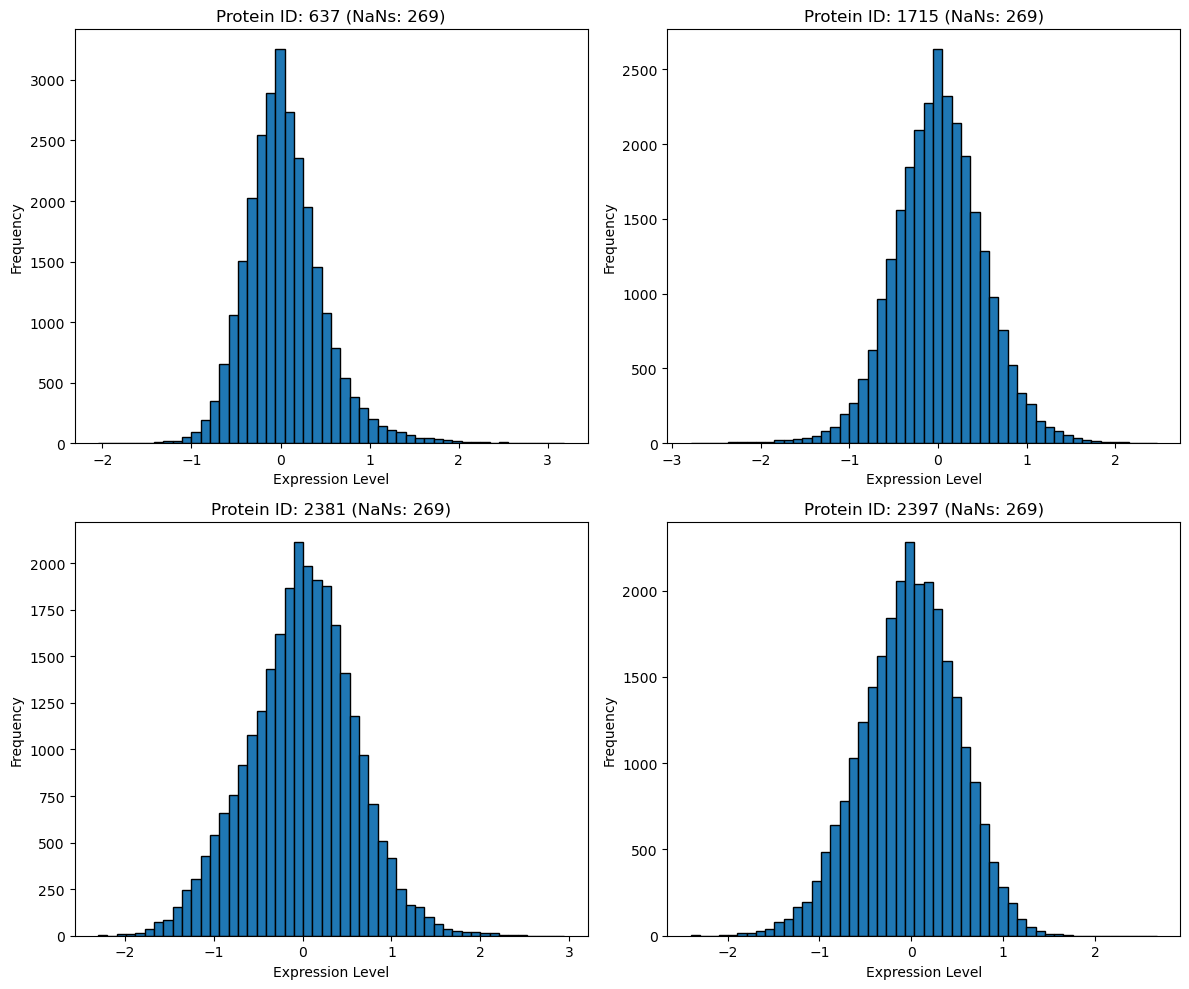

In [3]:
#sample histograms of proteins with least NA

import matplotlib.pyplot as plt
import numpy as np

# Drop the 'eid' column as it's likely the patient ID and not a feature
data_df = data_df.drop(columns=['eid'])

# Count the number of NaNs in each column (protein)
na_counts = data_df.isna().sum()

# Sort columns by the number of NaNs
sorted_columns = na_counts.sort_values().index[:4]

# Plot histograms for 4 proteins with fewest NaNs
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(sorted_columns):
    ax = axes[i]
    data = data_df[col].dropna()
    ax.hist(data, bins=50, edgecolor='black')
    ax.set_title(f'Protein ID: {col} (NaNs: {na_counts[col]})')
    ax.set_xlabel('Expression Level')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [4]:
# Calculate the mean and standard deviation for each column, ignoring NaN values
column_means = data_df.mean(skipna=True)
column_stds = data_df.std(skipna=True)

# Find the columns with the highest and lowest mean and standard deviation
highest_mean_col = column_means.idxmax()
lowest_mean_col = column_means.idxmin()
highest_std_col = column_stds.idxmax()
lowest_std_col = column_stds.idxmin()

highest_mean_value = column_means[highest_mean_col]
lowest_mean_value = column_means[lowest_mean_col]
highest_std_value = column_stds[highest_std_col]
lowest_std_value = column_stds[lowest_std_col]

highest_mean_col, highest_mean_value, lowest_mean_col, lowest_mean_value, highest_std_col, highest_std_value, lowest_std_col, lowest_std_value


('1960',
 0.5215706613128228,
 '1077',
 -2.445333561234402,
 '2091',
 3.3145931801796844,
 '1323',
 0.10116010914971665)

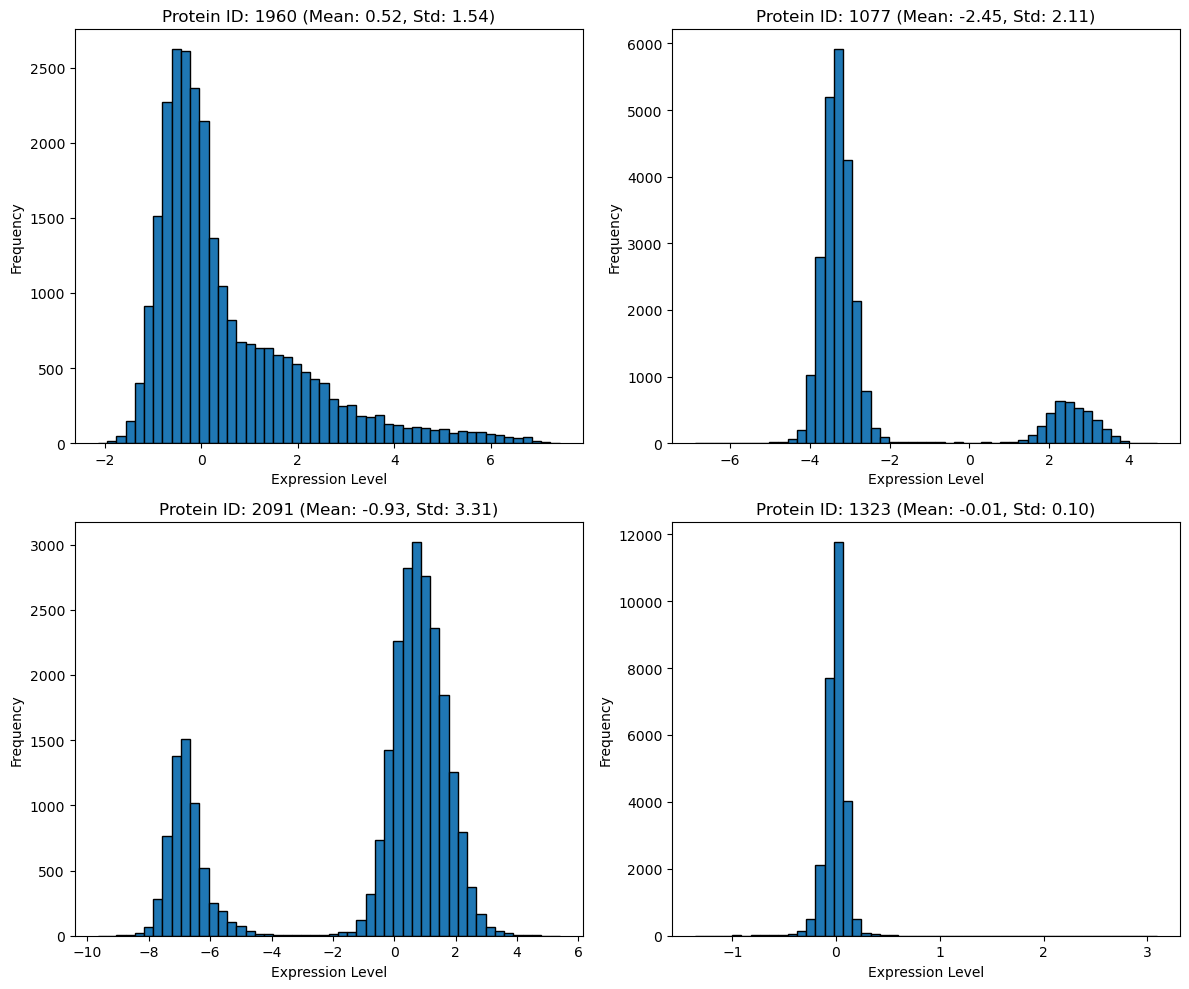

In [5]:
# List of columns to plot
columns_to_plot = [highest_mean_col, lowest_mean_col, highest_std_col, lowest_std_col]

# Plot histograms for the selected proteins
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    data = data_df[col].dropna()
    ax.hist(data, bins=50, edgecolor='black')
    ax.set_title(f'Protein ID: {col} (Mean: {column_means[col]:.2f}, Std: {column_stds[col]:.2f})')
    ax.set_xlabel('Expression Level')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [6]:
# Count the number of NaNs for the selected columns
nan_counts_selected = na_counts.loc[columns_to_plot]

nan_counts_selected


1960    814
1077    571
2091    590
1323    296
dtype: int64

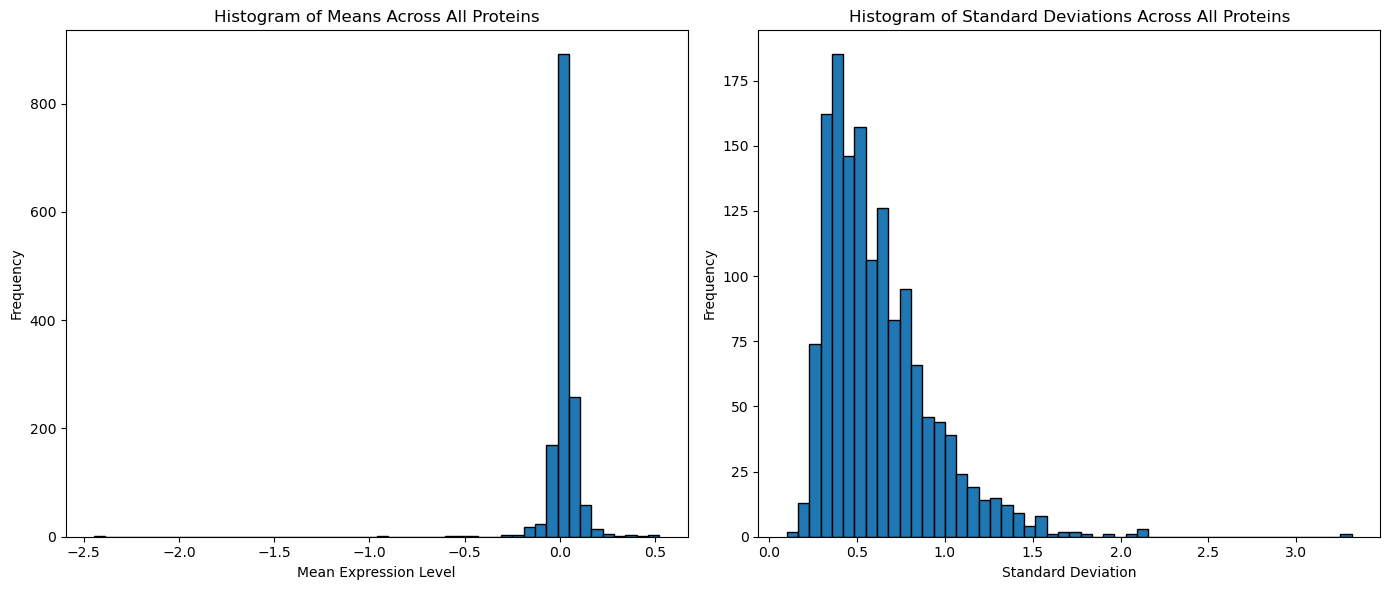

In [7]:
# Plot histograms for the means and standard deviations of all proteins
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for means
axes[0].hist(column_means, bins=50, edgecolor='black')
axes[0].set_title('Histogram of Means Across All Proteins')
axes[0].set_xlabel('Mean Expression Level')
axes[0].set_ylabel('Frequency')

# Histogram for standard deviations
axes[1].hist(column_stds, bins=50, edgecolor='black')
axes[1].set_title('Histogram of Standard Deviations Across All Proteins')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


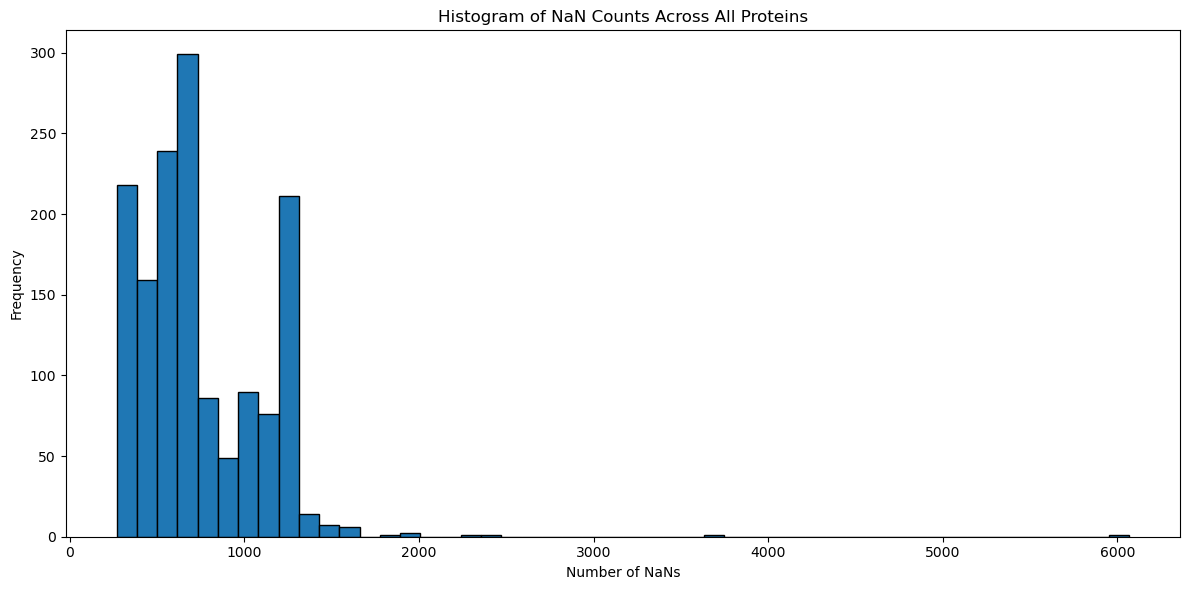

In [8]:
# Plot histogram for the count of NaNs across all proteins
plt.figure(figsize=(12, 6))
plt.hist(na_counts, bins=50, edgecolor='black')
plt.title('Histogram of NaN Counts Across All Proteins')
plt.xlabel('Number of NaNs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


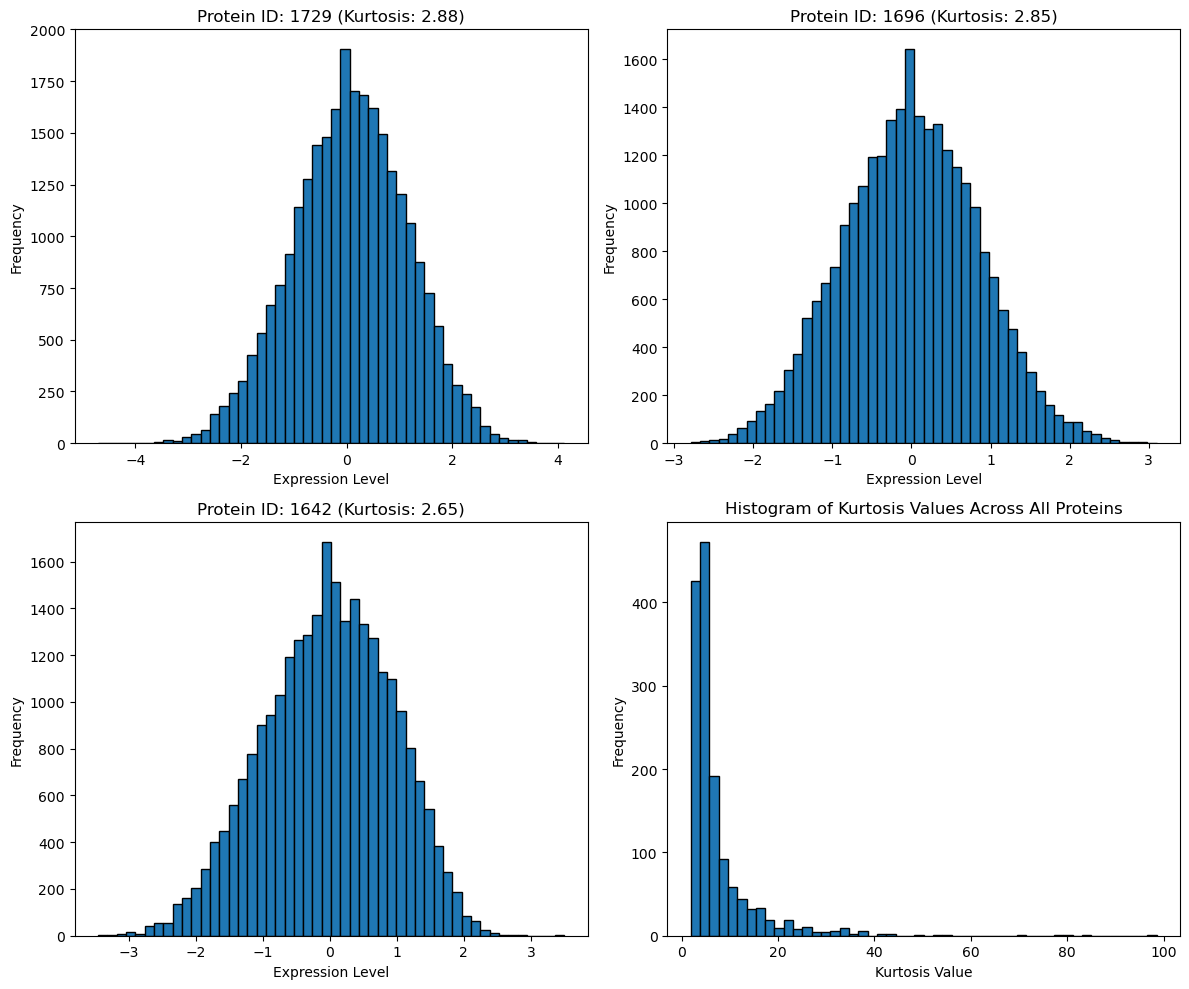

In [11]:
from scipy.stats import kurtosis

# Function to check if a distribution is bimodal based on its kurtosis
def is_bimodal(data):
    kurt = kurtosis(data, fisher=False)
    return kurt < 3

# Check bimodality for each protein column, ignoring NaN values
bimodal_columns = []
for col in data_df.columns:
    data = data_df[col].dropna()
    if is_bimodal(data):
        bimodal_columns.append(col)

# Count and list proteins with bimodal distributions
bimodal_count = len(bimodal_columns)
bimodal_count, bimodal_columns[:10]  # Show first 10 bimodal columns as a sample if the list is long


# Calculate kurtosis for each protein column, ignoring NaN values
all_kurtosis_values = []
for col in data_df.columns:
    data = data_df[col].dropna()
    kurt = kurtosis(data, fisher=False)
    all_kurtosis_values.append(kurt)

# Plot histograms for 3 selected bimodal proteins and the kurtosis of all proteins
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot for 3 bimodal proteins
for i, col in enumerate(bimodal_columns[:3]):
    ax = axes[i]
    data = data_df[col].dropna()
    ax.hist(data, bins=50, edgecolor='black')
    ax.set_title(f'Protein ID: {col} (Kurtosis: {kurtosis(data, fisher=False):.2f})')
    ax.set_xlabel('Expression Level')
    ax.set_ylabel('Frequency')

# Plot for kurtosis values of all proteins
ax = axes[3]
ax.hist(all_kurtosis_values, bins=50, edgecolor='black')
ax.set_title('Histogram of Kurtosis Values Across All Proteins')
ax.set_xlabel('Kurtosis Value')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


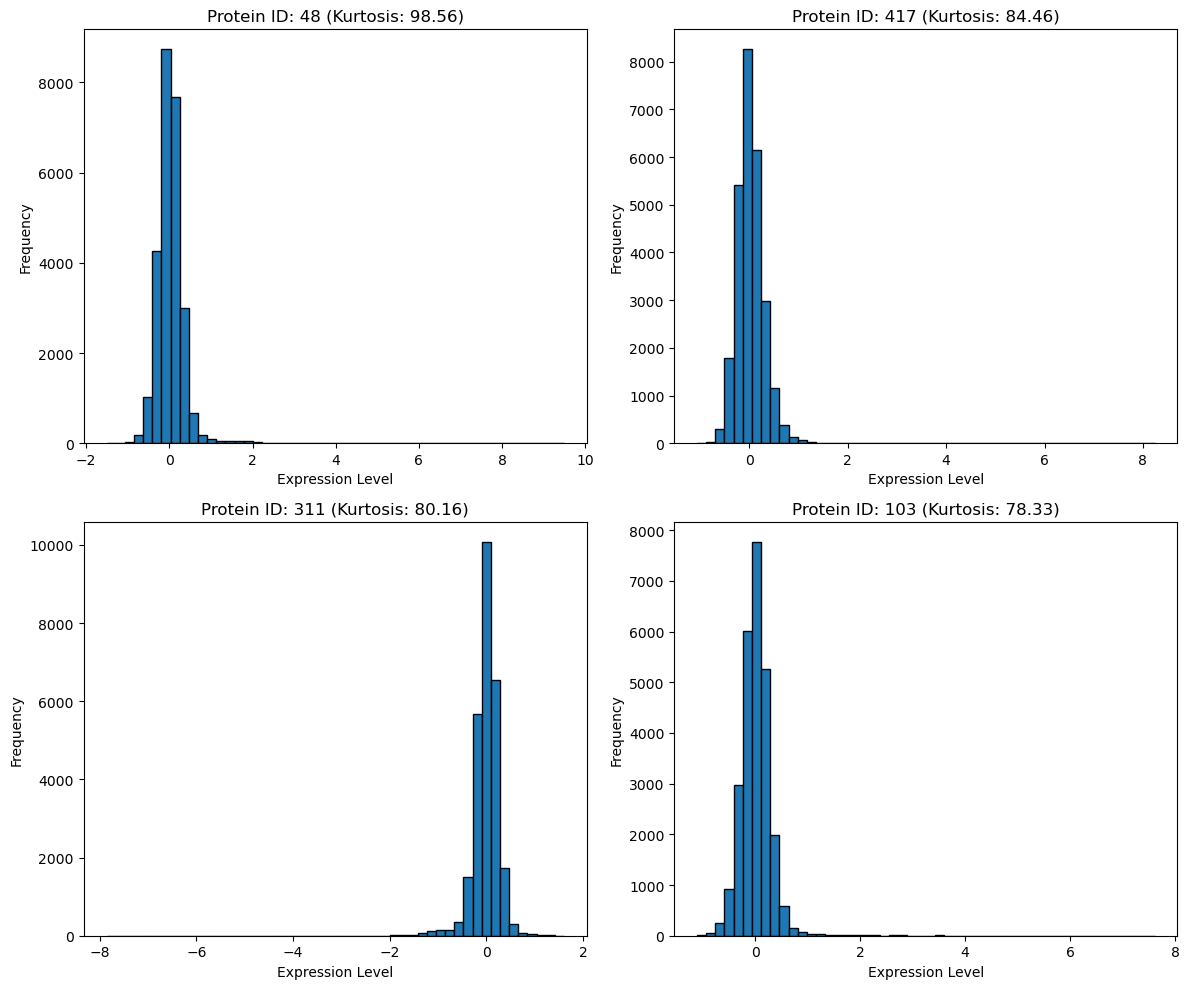

In [12]:
# Find the columns with the 4 highest kurtosis values
highest_kurtosis_indices = sorted(range(len(all_kurtosis_values)), key=lambda i: all_kurtosis_values[i], reverse=True)[:4]
highest_kurtosis_columns = [data_df.columns[i] for i in highest_kurtosis_indices]
highest_kurtosis_values = [all_kurtosis_values[i] for i in highest_kurtosis_indices]

# Plot histograms for the 4 proteins with the highest kurtosis values
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, (col, kurt) in enumerate(zip(highest_kurtosis_columns, highest_kurtosis_values)):
    ax = axes[i]
    data = data_df[col].dropna()
    ax.hist(data, bins=50, edgecolor='black')
    ax.set_title(f'Protein ID: {col} (Kurtosis: {kurt:.2f})')
    ax.set_xlabel('Expression Level')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## cleaning the protein data

In [15]:
# Import the necessary library for data manipulation
import pandas as pd
data_df = pd.read_csv('UKBB_300K_Overlapping_OLINK.csv')

# Initialize an empty DataFrame to store the cleaned and normalized data
cleaned_data_df = pd.DataFrame()

# Loop through each column in the original DataFrame to conditionally normalize and remove outliers
for col in data_df.columns:
    series = data_df[col]
    
    # Calculate mean and standard deviation, excluding NaNs for the calculation
    mean_val = series.mean()
    std_val = series.std()
    
    # Conditionally normalize mean to 0 and standard deviation to 1
    if not -0.1 <= mean_val <= 0.1:
        series = series - mean_val
    if not 0.9 <= std_val <= 1.1:
        series = series / std_val
    
    # Remove outliers more than 3 standard deviations from the mean
    final_mean = series.mean()
    final_std = series.std()
    cleaned_series = series[(series >= final_mean - 3 * final_std) & (series <= final_mean + 3 * final_std)]
    
    # Append the cleaned_series to the cleaned DataFrame, aligning it with the original DataFrame's index
    cleaned_data_df[col] = pd.Series(cleaned_series, index=data_df.index)

# Show some basic statistics to confirm that the data has been cleaned and normalized
cleaned_stats = cleaned_data_df.describe()
cleaned_stats.head()


/tmp/ipykernel_8616/3621383817.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_data_df[col] = pd.Series(cleaned_series, index=data_df.index)
/tmp/ipykernel_8616/3621383817.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_data_df[col] = pd.Series(cleaned_series, index=data_df.index)
/tmp/ipykernel_8616/3621383817.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

,eid,1693,1719,1733,1732,1731,1730,1729,1723,1721,...,1311,1312,1285,1259,1272,1281,1282,1284,795,1605
count,2.733700e+04,26590.000000,26646.000000,26522.000000,26479.000000,25737.000000,26534.000000,26662.000000,26106.000000,26263.000000,...,26379.000000,26871.000000,25947.000000,25904.000000,26033.000000,26279.000000,25742.000000,26146.000000,25901.000000,25589.000000
mean,1.996184e-16,0.075920,0.085530,0.066304,0.037723,-0.034520,-0.011380,0.064448,0.049754,0.056011,...,0.008146,0.025295,0.065369,-0.012970,-0.027071,0.029498,0.051904,0.029899,0.059197,0.010617
std,1.000000e+00,0.929629,0.936690,0.943890,0.927713,1.007681,0.916336,1.066193,0.956456,0.912209,...,0.933306,0.954949,0.957138,0.811595,0.921209,0.949684,0.827490,0.935990,0.877707,0.924205
min,-1.733327e+00,-2.856058,-2.880833,-2.903228,-2.933611,-3.105600,-2.660266,-3.153400,-2.923381,-2.999875,...,-2.978193,-2.959475,-2.903908,-2.937681,-3.009958,-2.950048,-2.797589,-2.961969,-2.881732,-2.970403
25%,-8.680755e-01,-0.576474,-0.541355,-0.564890,-0.584173,-0.724500,-0.690216,-0.656637,-0.616006,-0.061563,...,-0.600650,-0.601614,-0.609655,-0.518305,-0.621362,-0.605322,-0.496298,-0.569707,-0.533114,-0.607285


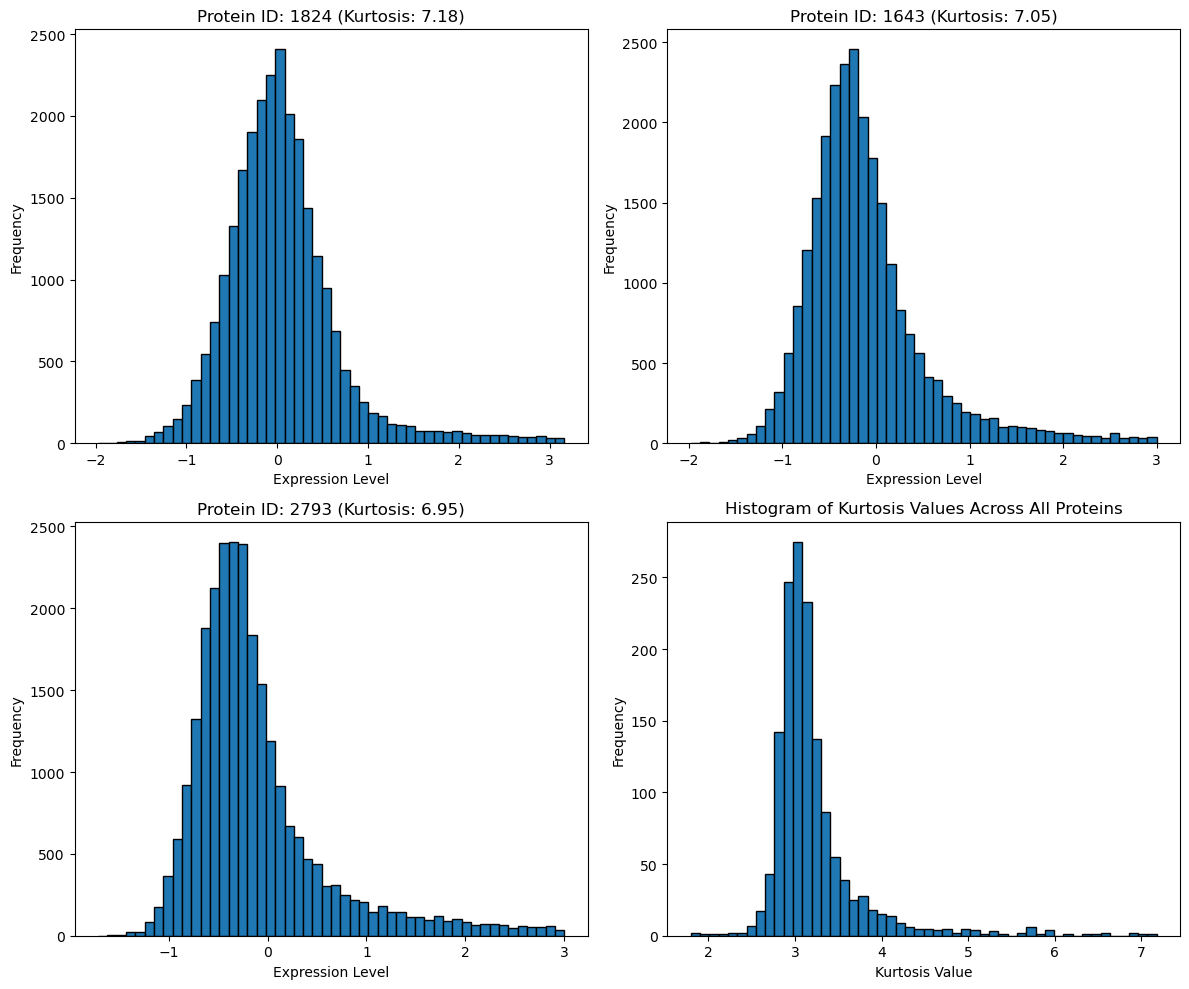

In [16]:
from scipy.stats import kurtosis
import matplotlib.pyplot as plt

# Calculate kurtosis for each protein column in the cleaned data, ignoring NaN values
cleaned_all_kurtosis_values = []
for col in cleaned_data_df.columns:
    data = cleaned_data_df[col].dropna()
    kurt = kurtosis(data, fisher=False)
    cleaned_all_kurtosis_values.append(kurt)

# Find the columns with the 3 highest kurtosis values
highest_kurtosis_indices = sorted(range(len(cleaned_all_kurtosis_values)), key=lambda i: cleaned_all_kurtosis_values[i], reverse=True)[:3]
highest_kurtosis_columns = [cleaned_data_df.columns[i] for i in highest_kurtosis_indices]
highest_kurtosis_values = [cleaned_all_kurtosis_values[i] for i in highest_kurtosis_indices]

# Plot histograms for the 3 proteins with the highest kurtosis values and the kurtosis of all proteins
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot for 3 proteins with highest kurtosis
for i, (col, kurt) in enumerate(zip(highest_kurtosis_columns, highest_kurtosis_values)):
    ax = axes[i]
    data = cleaned_data_df[col].dropna()
    ax.hist(data, bins=50, edgecolor='black')
    ax.set_title(f'Protein ID: {col} (Kurtosis: {kurt:.2f})')
    ax.set_xlabel('Expression Level')
    ax.set_ylabel('Frequency')

# Plot for kurtosis values of all proteins
ax = axes[3]
ax.hist(cleaned_all_kurtosis_values, bins=50, edgecolor='black')
ax.set_title('Histogram of Kurtosis Values Across All Proteins')
ax.set_xlabel('Kurtosis Value')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [19]:
#now save out the new csv
cleaned_data_df.to_csv('cleaned_prot_data.csv', index=False)

## visualizing the metabolomic data

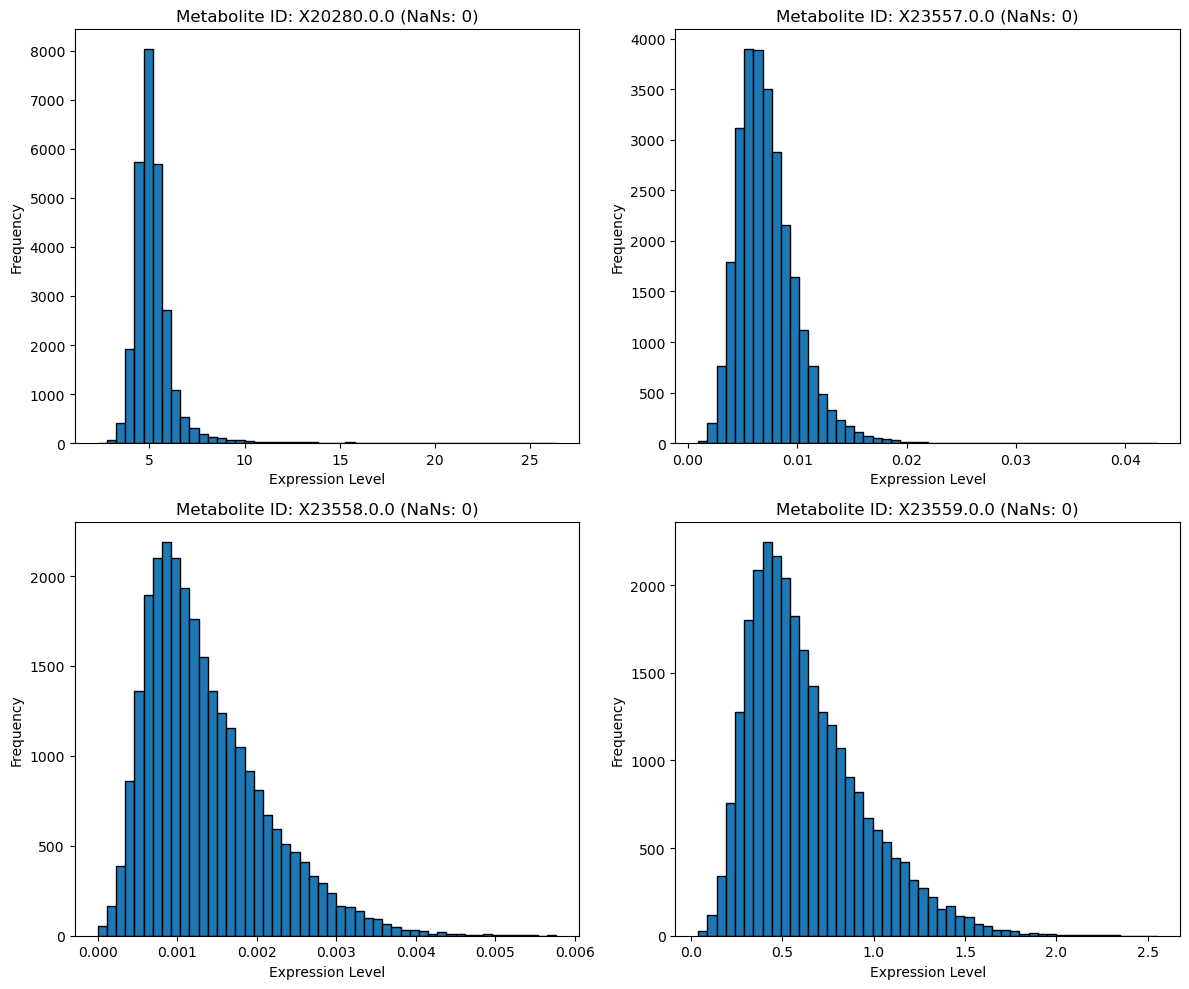

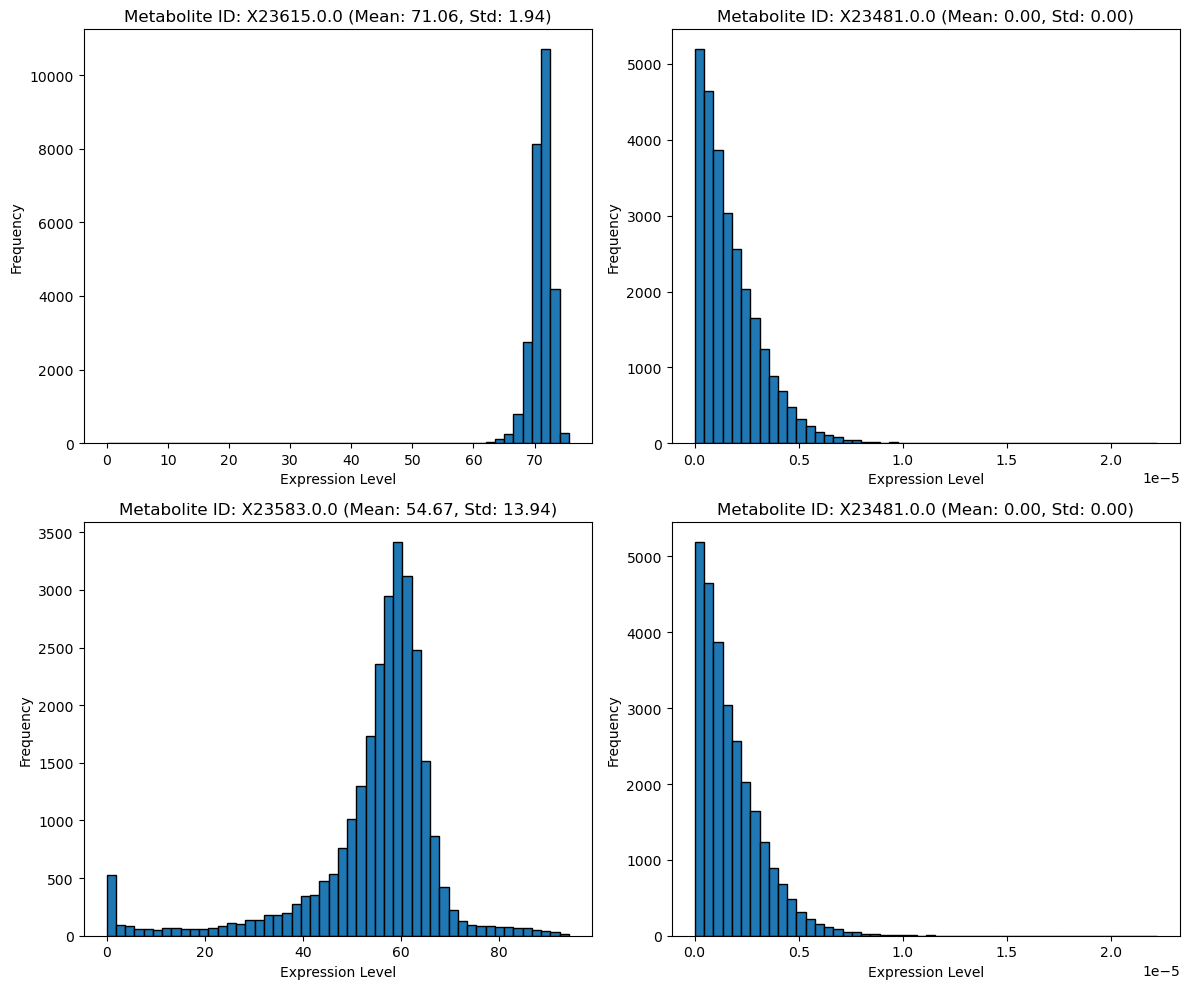

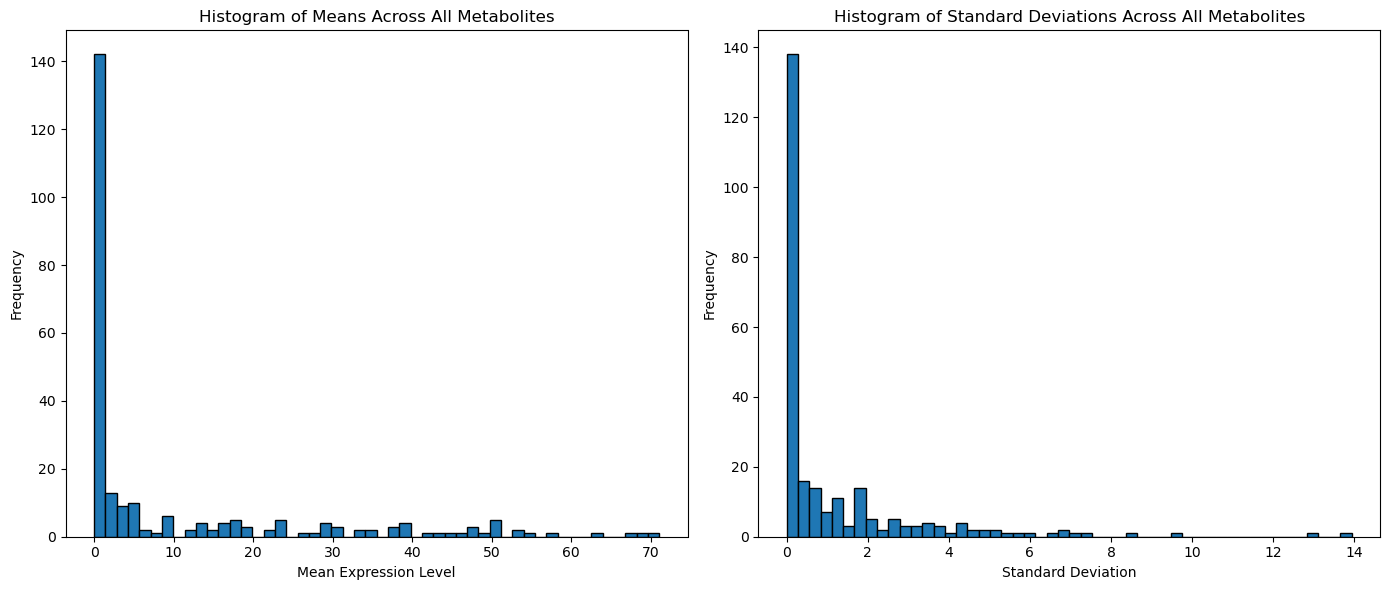

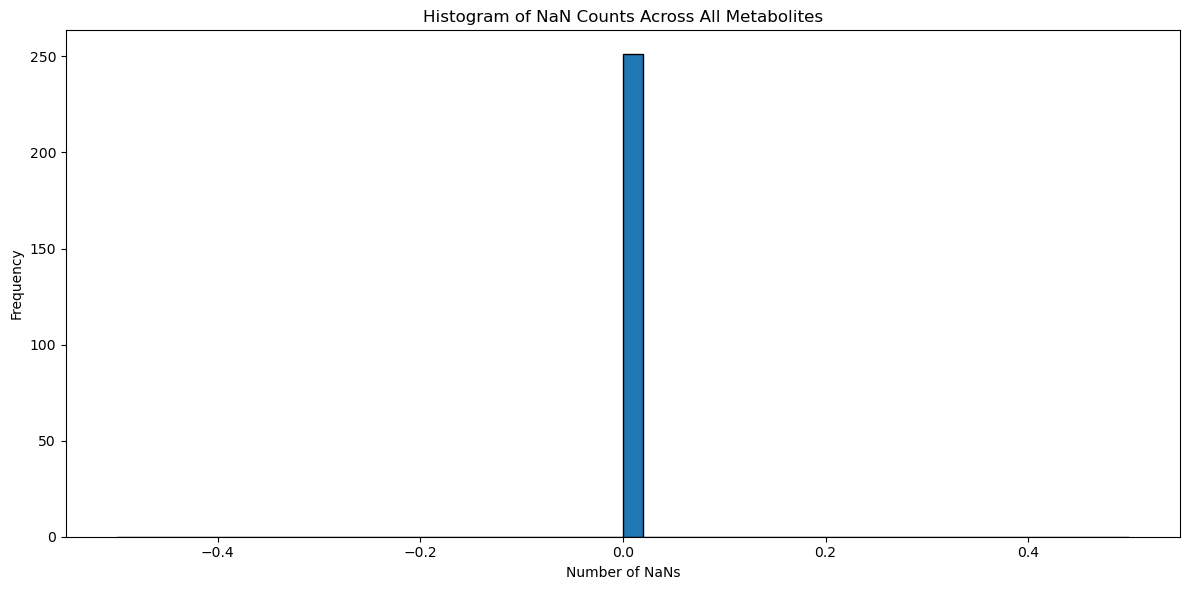

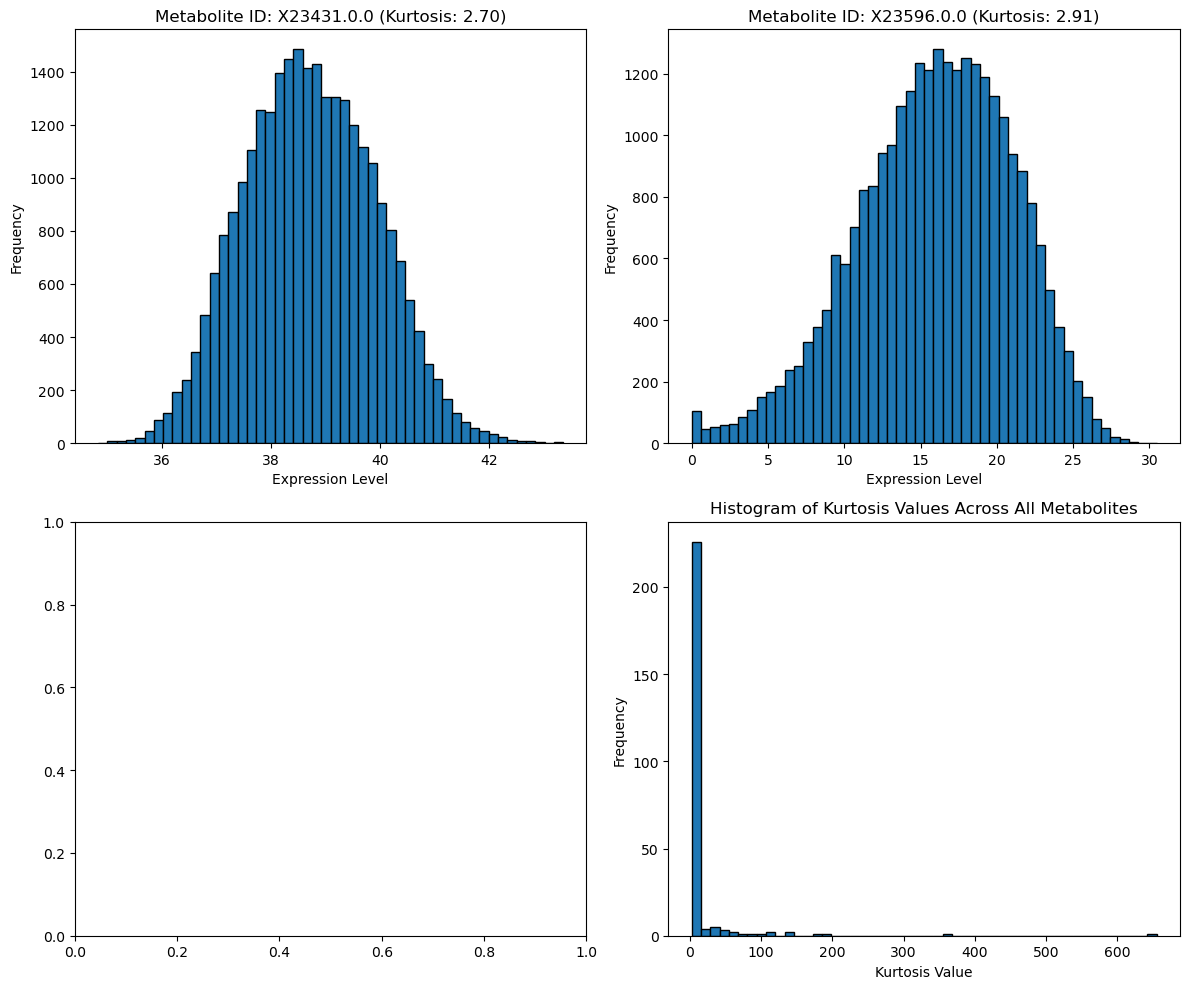

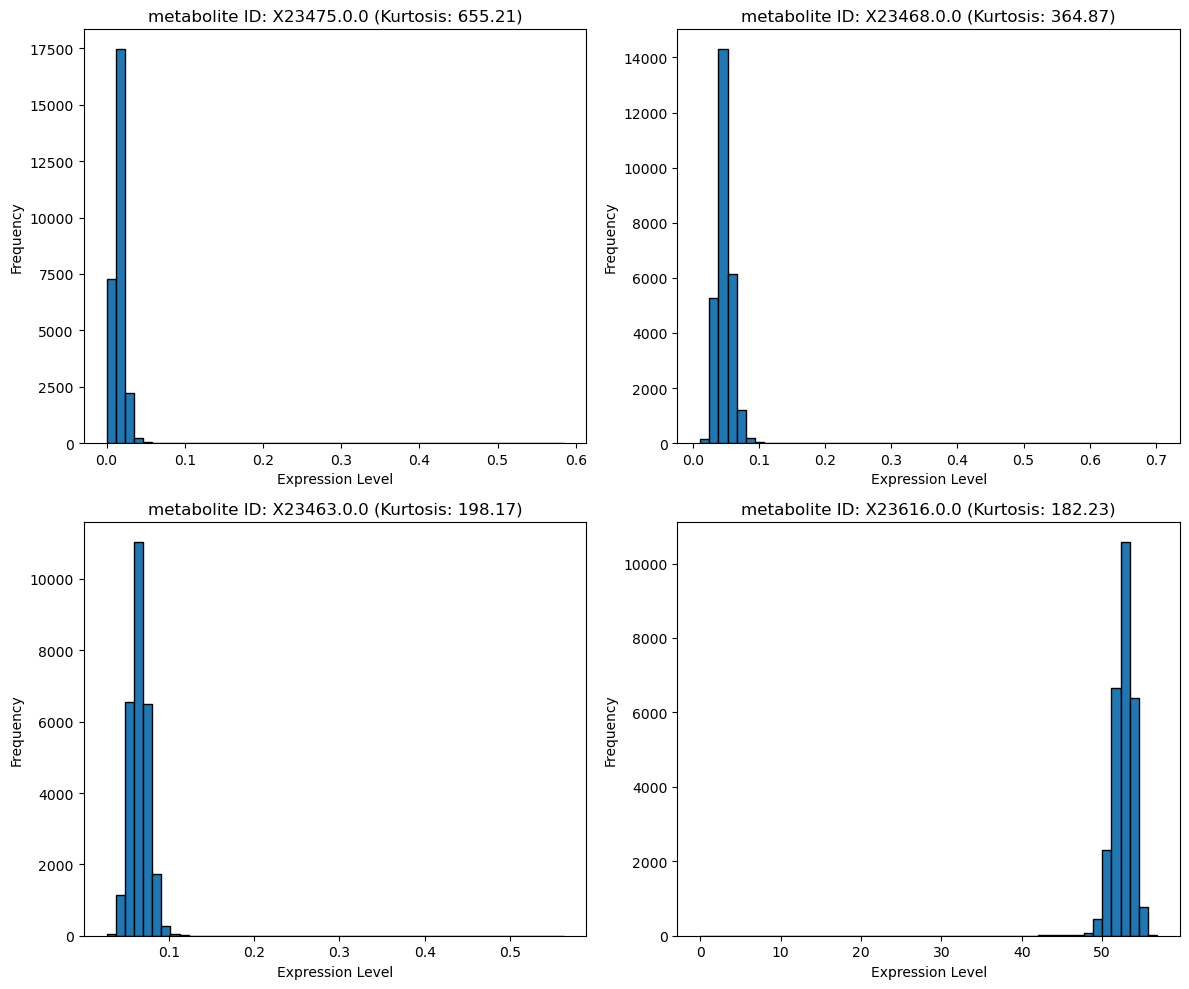

In [1]:
#we have our data, what we want to do is visualize it to determine if it's normal, first let's focu son the ones without any NA values
import pandas as pd
import os
os.chdir('/home/sarthak/cornell/Krumsiek')

# Load the CSV file into a DataFrame
file_path = 'UKBB_300K_Overlapping_MET.csv'
data_df = pd.read_csv(file_path)

# Show some basic statistics and the first few rows to understand the data
data_stats = data_df.describe()
data_head = data_df.head()

data_stats, data_head

#sample histograms of proteins with least NA

import matplotlib.pyplot as plt
import numpy as np

# Drop the 'eid' column as it's likely the patient ID and not a feature
data_df = data_df.drop(columns=['eid'])

# Count the number of NaNs in each column (protein)
na_counts = data_df.isna().sum()

# Sort columns by the number of NaNs
sorted_columns = na_counts.sort_values().index[:4]

# Plot histograms for 4 proteins with fewest NaNs
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(sorted_columns):
    ax = axes[i]
    data = data_df[col].dropna()
    ax.hist(data, bins=50, edgecolor='black')
    ax.set_title(f'Metabolite ID: {col} (NaNs: {na_counts[col]})')
    ax.set_xlabel('Expression Level')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate the mean and standard deviation for each column, ignoring NaN values
column_means = data_df.mean(skipna=True)
column_stds = data_df.std(skipna=True)

# Find the columns with the highest and lowest mean and standard deviation
highest_mean_col = column_means.idxmax()
lowest_mean_col = column_means.idxmin()
highest_std_col = column_stds.idxmax()
lowest_std_col = column_stds.idxmin()

highest_mean_value = column_means[highest_mean_col]
lowest_mean_value = column_means[lowest_mean_col]
highest_std_value = column_stds[highest_std_col]
lowest_std_value = column_stds[lowest_std_col]

highest_mean_col, highest_mean_value, lowest_mean_col, lowest_mean_value, highest_std_col, highest_std_value, lowest_std_col, lowest_std_value

# List of columns to plot
columns_to_plot = [highest_mean_col, lowest_mean_col, highest_std_col, lowest_std_col]

# Plot histograms for the selected proteins
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    data = data_df[col].dropna()
    ax.hist(data, bins=50, edgecolor='black')
    ax.set_title(f'Metabolite ID: {col} (Mean: {column_means[col]:.2f}, Std: {column_stds[col]:.2f})')
    ax.set_xlabel('Expression Level')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Count the number of NaNs for the selected columns
nan_counts_selected = na_counts.loc[columns_to_plot]

nan_counts_selected

# Plot histograms for the means and standard deviations of all proteins
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for means
axes[0].hist(column_means, bins=50, edgecolor='black')
axes[0].set_title('Histogram of Means Across All Metabolites')
axes[0].set_xlabel('Mean Expression Level')
axes[0].set_ylabel('Frequency')

# Histogram for standard deviations
axes[1].hist(column_stds, bins=50, edgecolor='black')
axes[1].set_title('Histogram of Standard Deviations Across All Metabolites')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot histogram for the count of NaNs across all proteins
plt.figure(figsize=(12, 6))
plt.hist(na_counts, bins=50, edgecolor='black')
plt.title('Histogram of NaN Counts Across All Metabolites')
plt.xlabel('Number of NaNs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

from scipy.stats import kurtosis

# Function to check if a distribution is bimodal based on its kurtosis
def is_bimodal(data):
    kurt = kurtosis(data, fisher=False)
    return kurt < 3

# Check bimodality for each protein column, ignoring NaN values
bimodal_columns = []
for col in data_df.columns:
    data = data_df[col].dropna()
    if is_bimodal(data):
        bimodal_columns.append(col)

# Count and list proteins with bimodal distributions
bimodal_count = len(bimodal_columns)
bimodal_count, bimodal_columns[:10]  # Show first 10 bimodal columns as a sample if the list is long


# Calculate kurtosis for each protein column, ignoring NaN values
all_kurtosis_values = []
for col in data_df.columns:
    data = data_df[col].dropna()
    kurt = kurtosis(data, fisher=False)
    all_kurtosis_values.append(kurt)

# Plot histograms for 3 selected bimodal proteins and the kurtosis of all proteins
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot for 3 bimodal proteins
for i, col in enumerate(bimodal_columns[:3]):
    ax = axes[i]
    data = data_df[col].dropna()
    ax.hist(data, bins=50, edgecolor='black')
    ax.set_title(f'Metabolite ID: {col} (Kurtosis: {kurtosis(data, fisher=False):.2f})')
    ax.set_xlabel('Expression Level')
    ax.set_ylabel('Frequency')

# Plot for kurtosis values of all proteins
ax = axes[3]
ax.hist(all_kurtosis_values, bins=50, edgecolor='black')
ax.set_title('Histogram of Kurtosis Values Across All Metabolites')
ax.set_xlabel('Kurtosis Value')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Find the columns with the 4 highest kurtosis values
highest_kurtosis_indices = sorted(range(len(all_kurtosis_values)), key=lambda i: all_kurtosis_values[i], reverse=True)[:4]
highest_kurtosis_columns = [data_df.columns[i] for i in highest_kurtosis_indices]
highest_kurtosis_values = [all_kurtosis_values[i] for i in highest_kurtosis_indices]

# Plot histograms for the 4 proteins with the highest kurtosis values
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, (col, kurt) in enumerate(zip(highest_kurtosis_columns, highest_kurtosis_values)):
    ax = axes[i]
    data = data_df[col].dropna()
    ax.hist(data, bins=50, edgecolor='black')
    ax.set_title(f'metabolite ID: {col} (Kurtosis: {kurt:.2f})')
    ax.set_xlabel('Expression Level')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## cleaning metabolomic data

In [20]:
# Import the necessary library for data manipulation
import pandas as pd
data_df = pd.read_csv('UKBB_300K_Overlapping_MET.csv')

# Initialize an empty DataFrame to store the cleaned and normalized data
cleaned_data_df = pd.DataFrame()

# Loop through each column in the original DataFrame to conditionally normalize and remove outliers
for col in data_df.columns:
    series = data_df[col]
    
    # Calculate mean and standard deviation, excluding NaNs for the calculation
    mean_val = series.mean()
    std_val = series.std()
    
    # Conditionally normalize mean to 0 and standard deviation to 1
    if not -0.1 <= mean_val <= 0.1:
        series = series - mean_val
    if not 0.9 <= std_val <= 1.1:
        series = series / std_val
    
    # Remove outliers more than 3 standard deviations from the mean
    final_mean = series.mean()
    final_std = series.std()
    cleaned_series = series[(series >= final_mean - 3 * final_std) & (series <= final_mean + 3 * final_std)]
    
    # Append the cleaned_series to the cleaned DataFrame, aligning it with the original DataFrame's index
    cleaned_data_df[col] = pd.Series(cleaned_series, index=data_df.index)

# Show some basic statistics to confirm that the data has been cleaned and normalized
cleaned_stats = cleaned_data_df.describe()
cleaned_stats.head()


/tmp/ipykernel_8616/3512690858.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_data_df[col] = pd.Series(cleaned_series, index=data_df.index)
/tmp/ipykernel_8616/3512690858.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_data_df[col] = pd.Series(cleaned_series, index=data_df.index)
/tmp/ipykernel_8616/3512690858.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

,eid,X20280.0.0,X20281.0.0,X23400.0.0,X23401.0.0,X23402.0.0,X23403.0.0,X23404.0.0,X23405.0.0,X23406.0.0,...,X23639.0.0,X23640.0.0,X23641.0.0,X23642.0.0,X23643.0.0,X23644.0.0,X23645.0.0,X23646.0.0,X23647.0.0,X23648.0.0
count,2.733700e+04,26876.000000,27132.000000,27210.000000,27206.000000,27199.000000,27169.000000,27215.000000,27213.000000,27154.000000,...,27162.000000,27187.000000,27144.000000,27200.000000,27187.000000,27223.000000,27159.000000,27134.000000,27051.000000,27165.000000
mean,1.996184e-16,-0.092515,-0.028499,-0.013300,-0.016439,-0.017785,-0.021794,-0.014545,-0.013948,-0.024176,...,-0.022066,0.020127,0.025995,0.009863,-0.020653,-0.007460,0.022816,0.027722,-0.039887,-0.022625
std,1.000000e+00,0.641376,0.944604,0.944149,0.971517,0.970127,0.962925,0.973562,0.972296,0.955529,...,0.959632,0.960165,0.949546,0.966310,0.953494,0.977178,0.956067,0.943289,0.911632,0.953404
min,-1.733327e+00,-2.369992,-2.779193,-2.848682,-2.987954,-2.842477,-2.579428,-2.979302,-2.955386,-2.625957,...,-2.878046,-2.999961,-2.994922,-2.998545,-2.913906,-2.993967,-2.995955,-2.999736,-2.985670,-2.956795
25%,-8.680755e-01,-0.498354,-0.709795,-0.657082,-0.707092,-0.715249,-0.737093,-0.700039,-0.696208,-0.734397,...,-0.713422,-0.605799,-0.573543,-0.629456,-0.704115,-0.672441,-0.590052,-0.559627,-0.662315,-0.680528


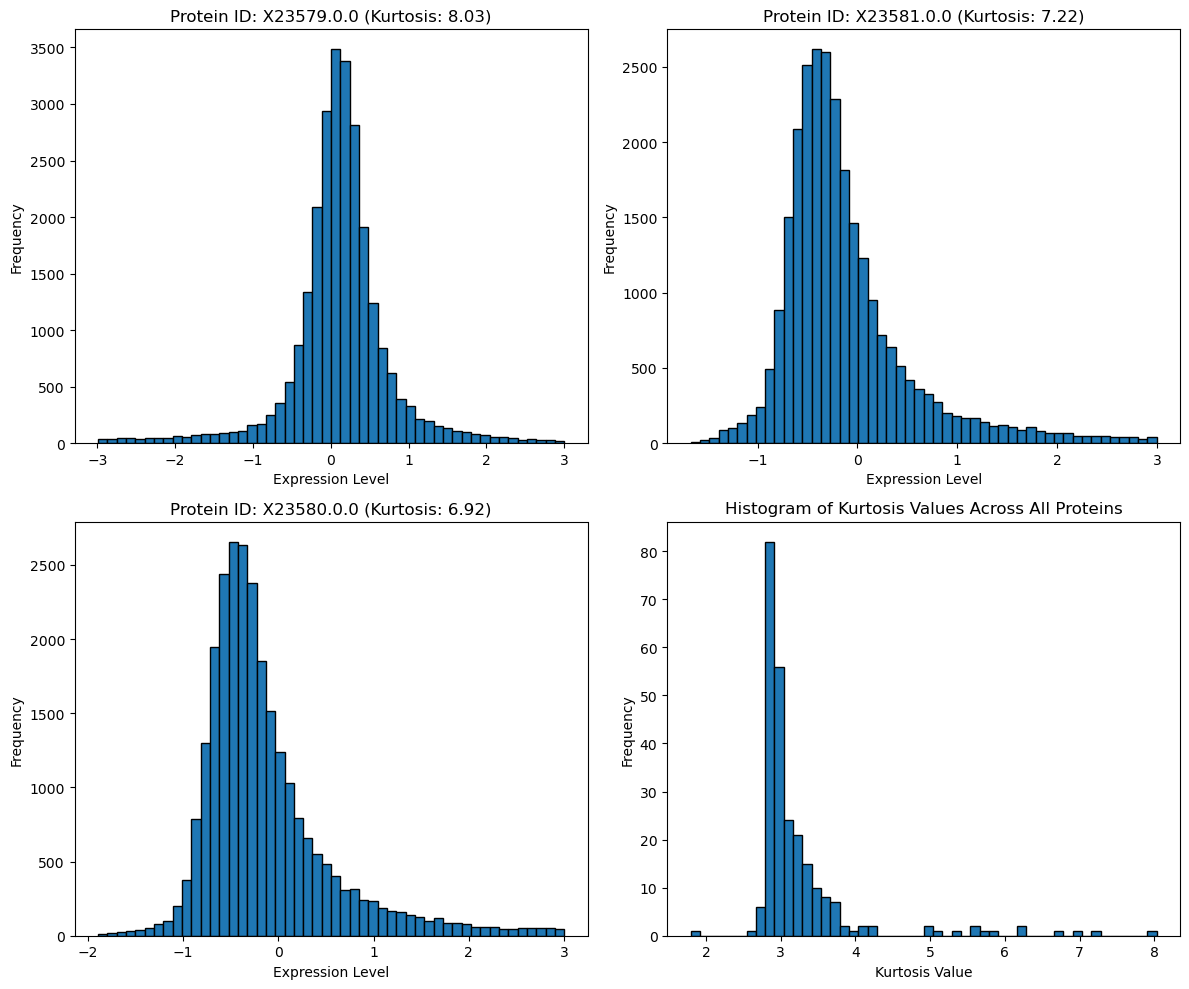

In [21]:
from scipy.stats import kurtosis
import matplotlib.pyplot as plt

# Calculate kurtosis for each protein column in the cleaned data, ignoring NaN values
cleaned_all_kurtosis_values = []
for col in cleaned_data_df.columns:
    data = cleaned_data_df[col].dropna()
    kurt = kurtosis(data, fisher=False)
    cleaned_all_kurtosis_values.append(kurt)

# Find the columns with the 3 highest kurtosis values
highest_kurtosis_indices = sorted(range(len(cleaned_all_kurtosis_values)), key=lambda i: cleaned_all_kurtosis_values[i], reverse=True)[:3]
highest_kurtosis_columns = [cleaned_data_df.columns[i] for i in highest_kurtosis_indices]
highest_kurtosis_values = [cleaned_all_kurtosis_values[i] for i in highest_kurtosis_indices]

# Plot histograms for the 3 proteins with the highest kurtosis values and the kurtosis of all proteins
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot for 3 proteins with highest kurtosis
for i, (col, kurt) in enumerate(zip(highest_kurtosis_columns, highest_kurtosis_values)):
    ax = axes[i]
    data = cleaned_data_df[col].dropna()
    ax.hist(data, bins=50, edgecolor='black')
    ax.set_title(f'metabolite ID: {col} (Kurtosis: {kurt:.2f})')
    ax.set_xlabel('Expression Level')
    ax.set_ylabel('Frequency')

# Plot for kurtosis values of all proteins
ax = axes[3]
ax.hist(cleaned_all_kurtosis_values, bins=50, edgecolor='black')
ax.set_title('Histogram of Kurtosis Values Across All metabolites')
ax.set_xlabel('Kurtosis Value')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [22]:
#save it out
cleaned_data_df.to_csv('cleaned_met_data.csv', index=False)